## Breast Cancer

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [98]:
#Load Dataset:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
df = pd.read_csv(url, sep=',', header=None)
df.columns = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat','Class']

In [99]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [100]:
df.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig      object
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object

convert ‘deg-malig’ column values to numeric

In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['deg-malig'] = label_encoder.fit_transform(df['deg-malig'])
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes',2,'right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no',0,'right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no',1,'left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes',2,'right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes',1,'left','right_up','no','recurrence-events'


In [102]:
df.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int32
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object

In [103]:
# Display unique values in each column

for i in df.columns:
    uniuqe = df[i].unique()
    print(i)
    print(uniuqe)
    print()

age
["'40-49'" "'50-59'" "'60-69'" "'30-39'" "'70-79'" "'20-29'"]

menopause
["'premeno'" "'ge40'" "'lt40'"]

tumor-size
["'15-19'" "'35-39'" "'30-34'" "'25-29'" "'40-44'" "'10-14'" "'0-4'"
 "'20-24'" "'45-49'" "'50-54'" "'5-9'"]

inv-nodes
["'0-2'" "'3-5'" "'15-17'" "'6-8'" "'9-11'" "'24-26'" "'12-14'"]

node-caps
["'yes'" "'no'" nan]

deg-malig
[2 0 1]

breast
["'right'" "'left'"]

breast-quad
["'left_up'" "'central'" "'left_low'" "'right_up'" "'right_low'" nan]

irradiat
["'no'" "'yes'"]

Class
["'recurrence-events'" "'no-recurrence-events'"]



Data Preprocessing

In [104]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [105]:
df.dropna(inplace=True)

In [106]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [107]:
df.columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']

In [108]:

# Select numerical columns
numerical_columns = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']

# Compute the statistical summary
summary = df[numerical_columns].describe()

# Print the statistical summary
print(summary)

        deg-malig
count  277.000000
mean     1.057762
std      0.729989
min      0.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      2.000000


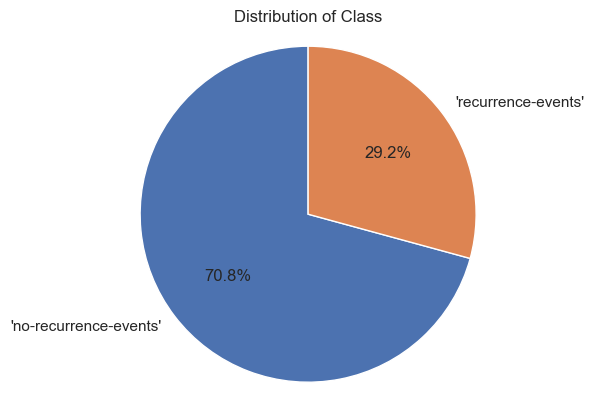

In [109]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()
sns.set_theme(style="darkgrid")

# Create a pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Class')
plt.show()

In [110]:
#Data frame for non recurring events
no_recurring_events = df[df['Class'] == "'no-recurrence-events'"].copy()
no_recurring_events = no_recurring_events.drop('Class', axis=1)
no_recurring_events.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
1,'50-59','ge40','15-19','0-2','no',0,'right','central','no'
3,'40-49','premeno','35-39','0-2','yes',2,'right','left_low','yes'
5,'50-59','premeno','25-29','3-5','no',1,'right','left_up','yes'
6,'50-59','ge40','40-44','0-2','no',2,'left','left_up','no'
7,'40-49','premeno','10-14','0-2','no',1,'left','left_up','no'


In [111]:
recurrence_event = df[df['Class'] == "'recurrence-events'"].copy()
recurrence_event.drop('Class', axis=1, inplace=True)
recurrence_event.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,'40-49','premeno','15-19','0-2','yes',2,'right','left_up','no'
2,'50-59','ge40','35-39','0-2','no',1,'left','left_low','no'
4,'40-49','premeno','30-34','3-5','yes',1,'left','right_up','no'
14,'40-49','premeno','25-29','0-2','no',1,'left','left_low','yes'
24,'30-39','premeno','15-19','6-8','yes',2,'left','left_low','yes'


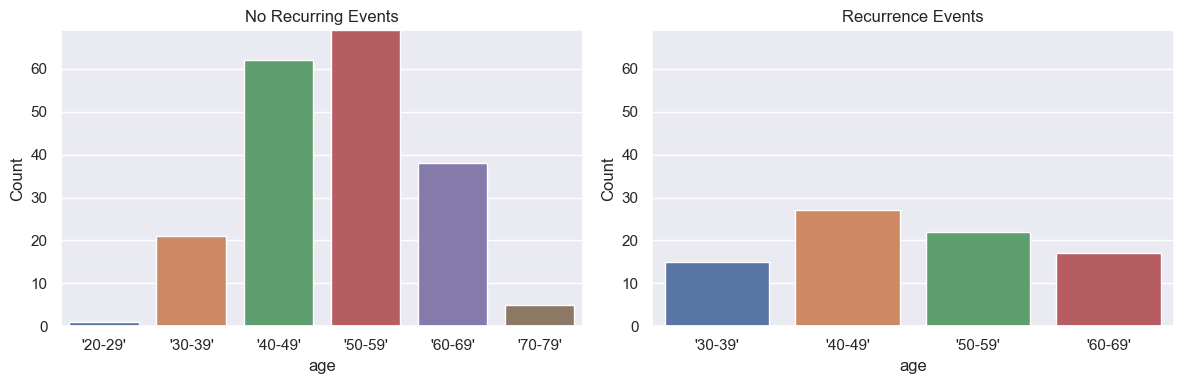

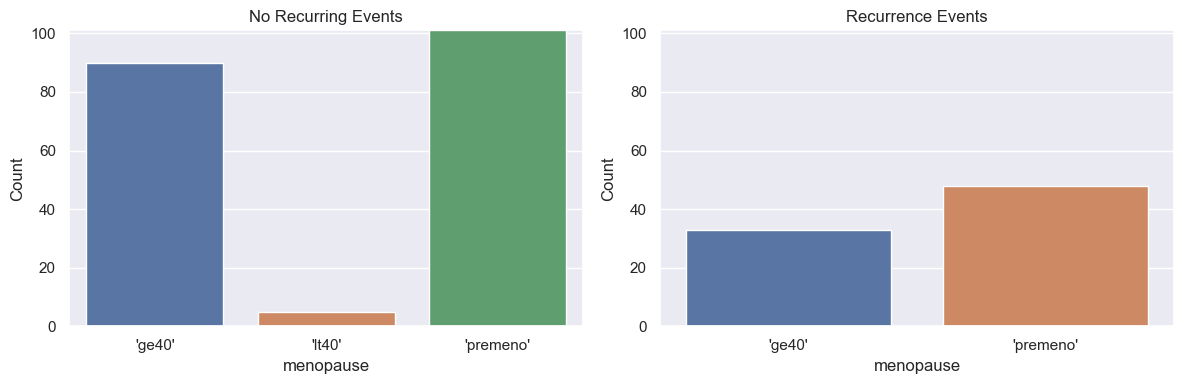

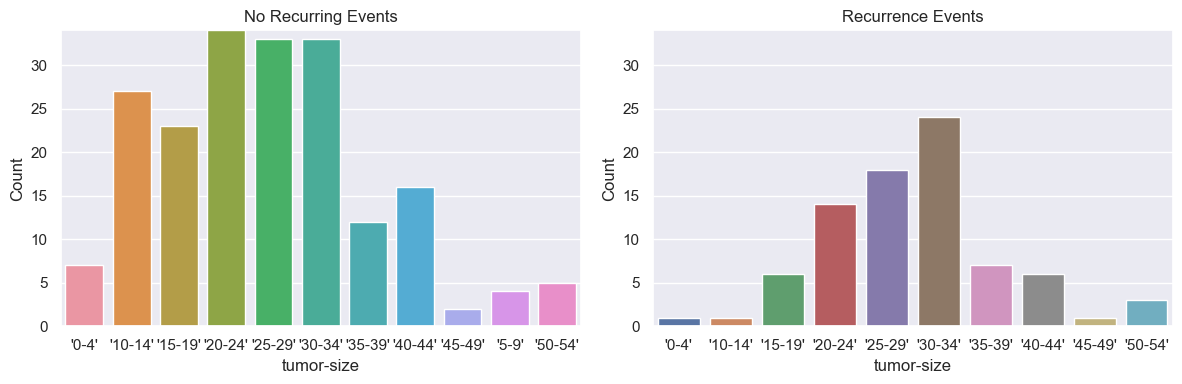

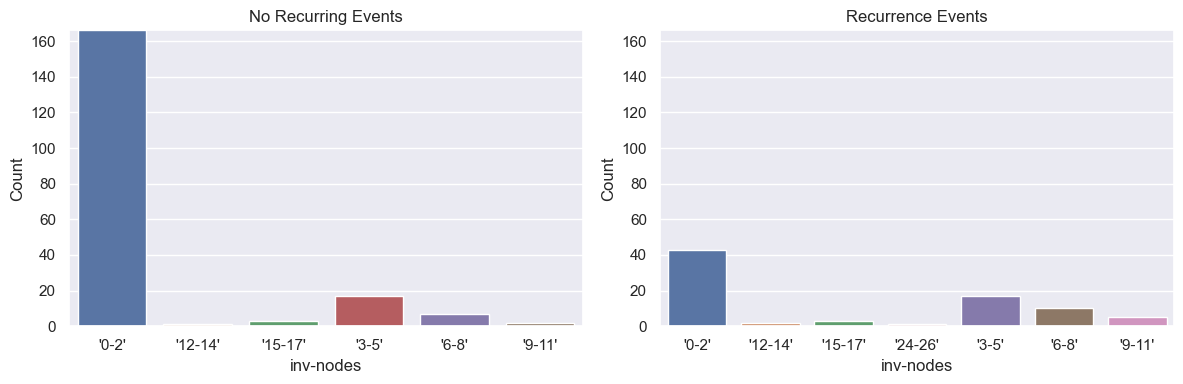

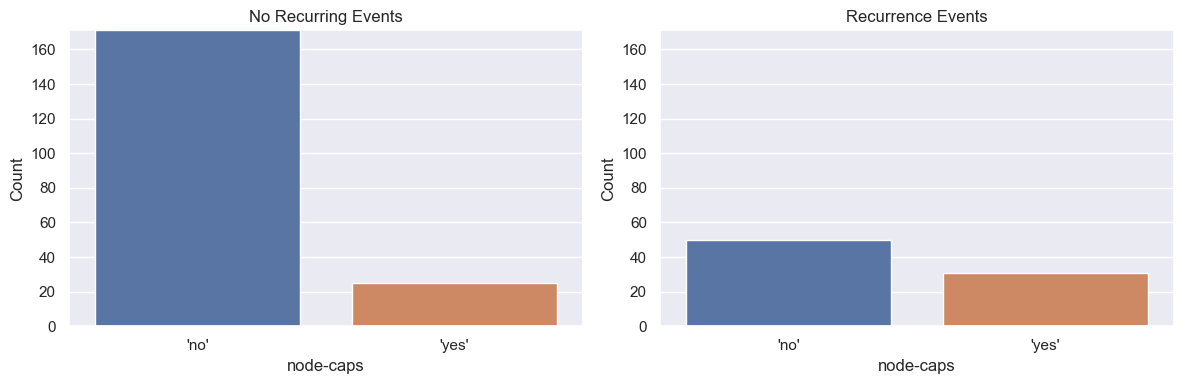

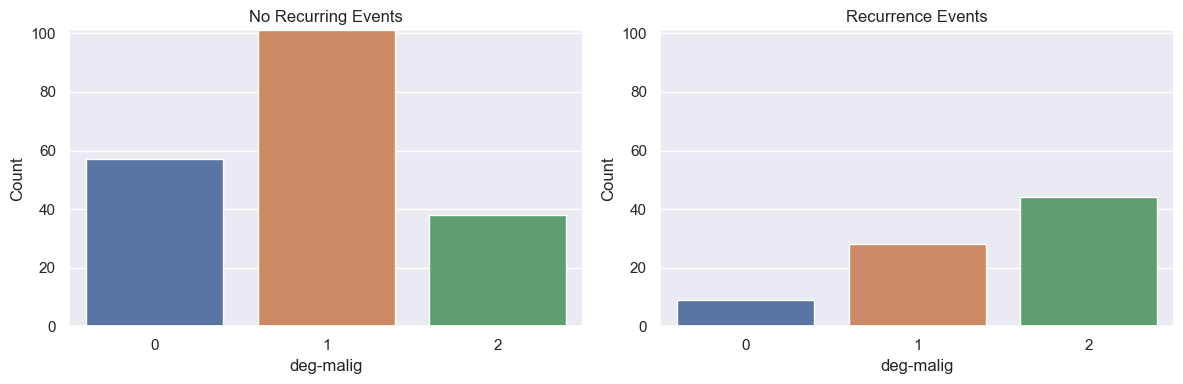

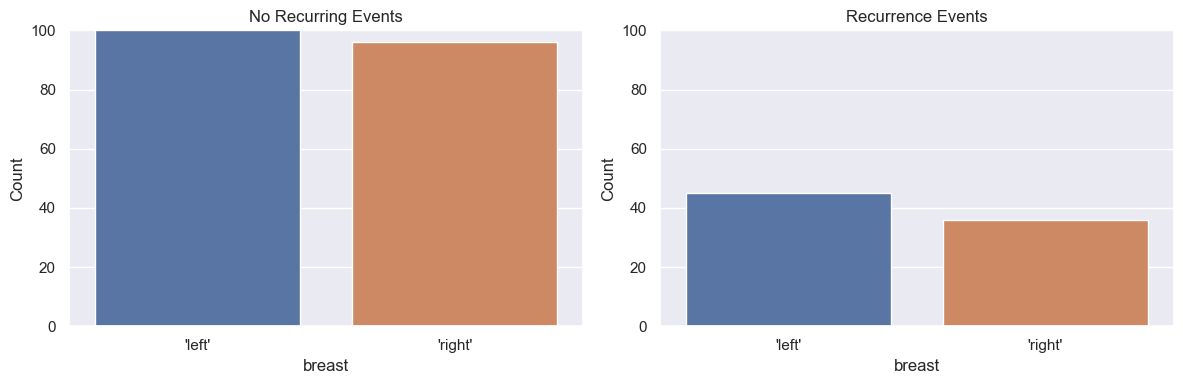

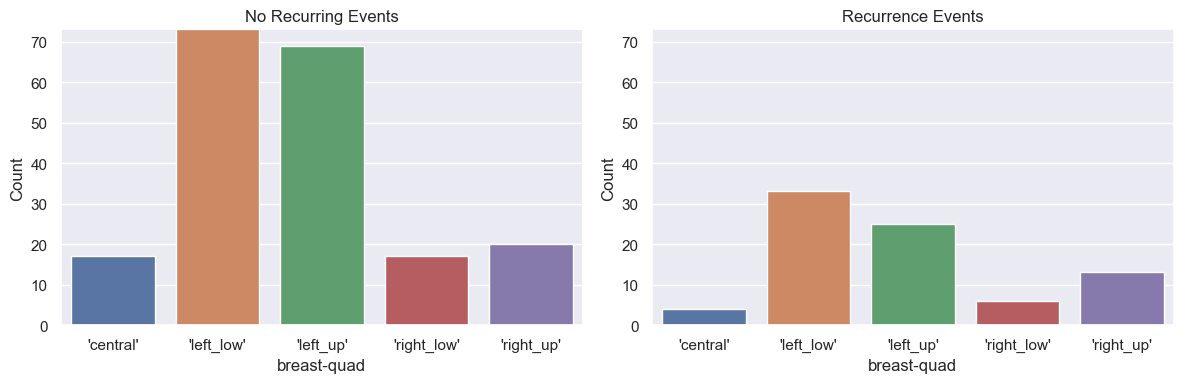

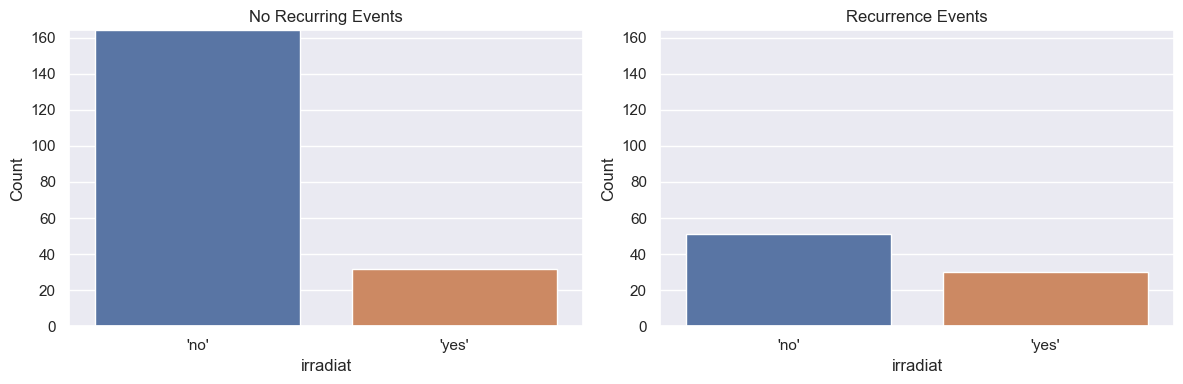

In [112]:
for column in no_recurring_events.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(data=no_recurring_events, x=column, order=sorted(no_recurring_events[column].unique()), ax=ax[0])
    ax[0].set_title('No Recurring Events')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Count')

    sns.countplot(data=recurrence_event, x=column, order=sorted(recurrence_event[column].unique()), ax=ax[1])
    ax[1].set_title('Recurrence Events')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Count')

    max_count = max(no_recurring_events[column].value_counts().max(), recurrence_event[column].value_counts().max())
    ax[0].set_ylim([0, max_count])
    ax[1].set_ylim([0, max_count])

    plt.tight_layout()
    plt.show()


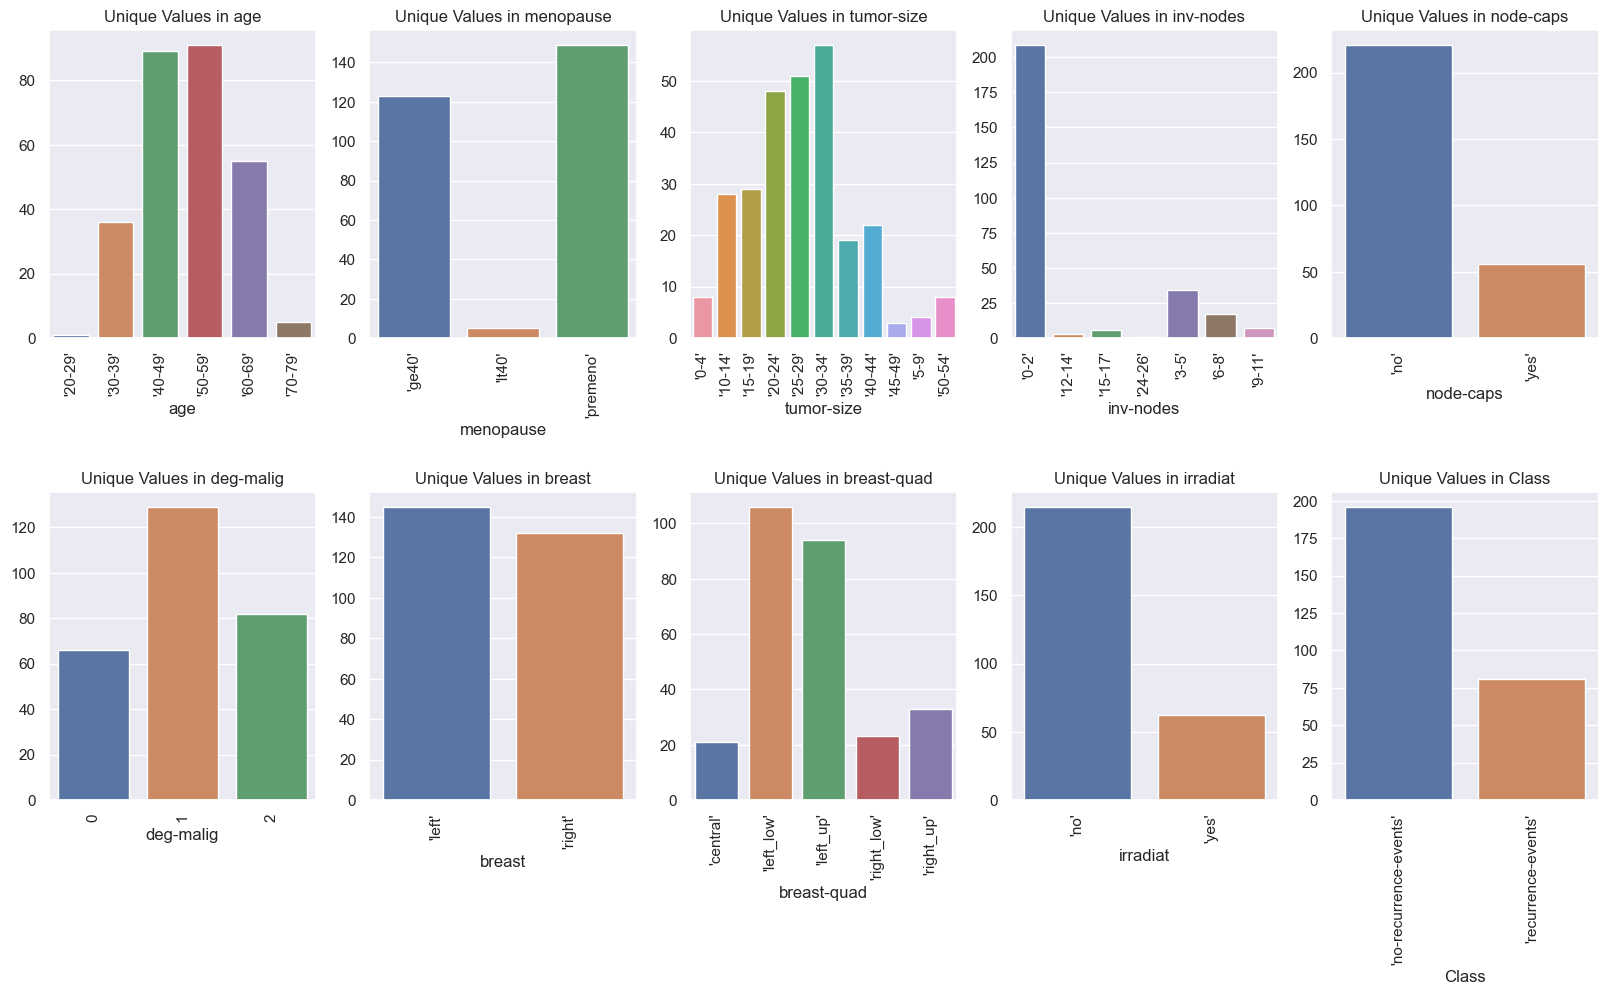

In [113]:
sns.set_theme(style="darkgrid")

# Create subplots with a 2 x 5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)


for i, col in enumerate(df.columns):
    unique_values = df[col].unique()
    unique_values.sort() 
    row = i // 5
    col_name = col  
    ax = axes[row, i % 5]  
    sns.countplot(data=df, x=col_name, ax=ax, order=unique_values)  
    ax.set_title(f'Unique Values in {col_name}')
    ax.set_xlabel(col_name)
    ax.set_ylabel('')  
    ax.set_xticks(range(len(unique_values)))
    ax.set_xticklabels(labels=unique_values, rotation=90)

plt.show()

<Figure size 1800x2000 with 0 Axes>

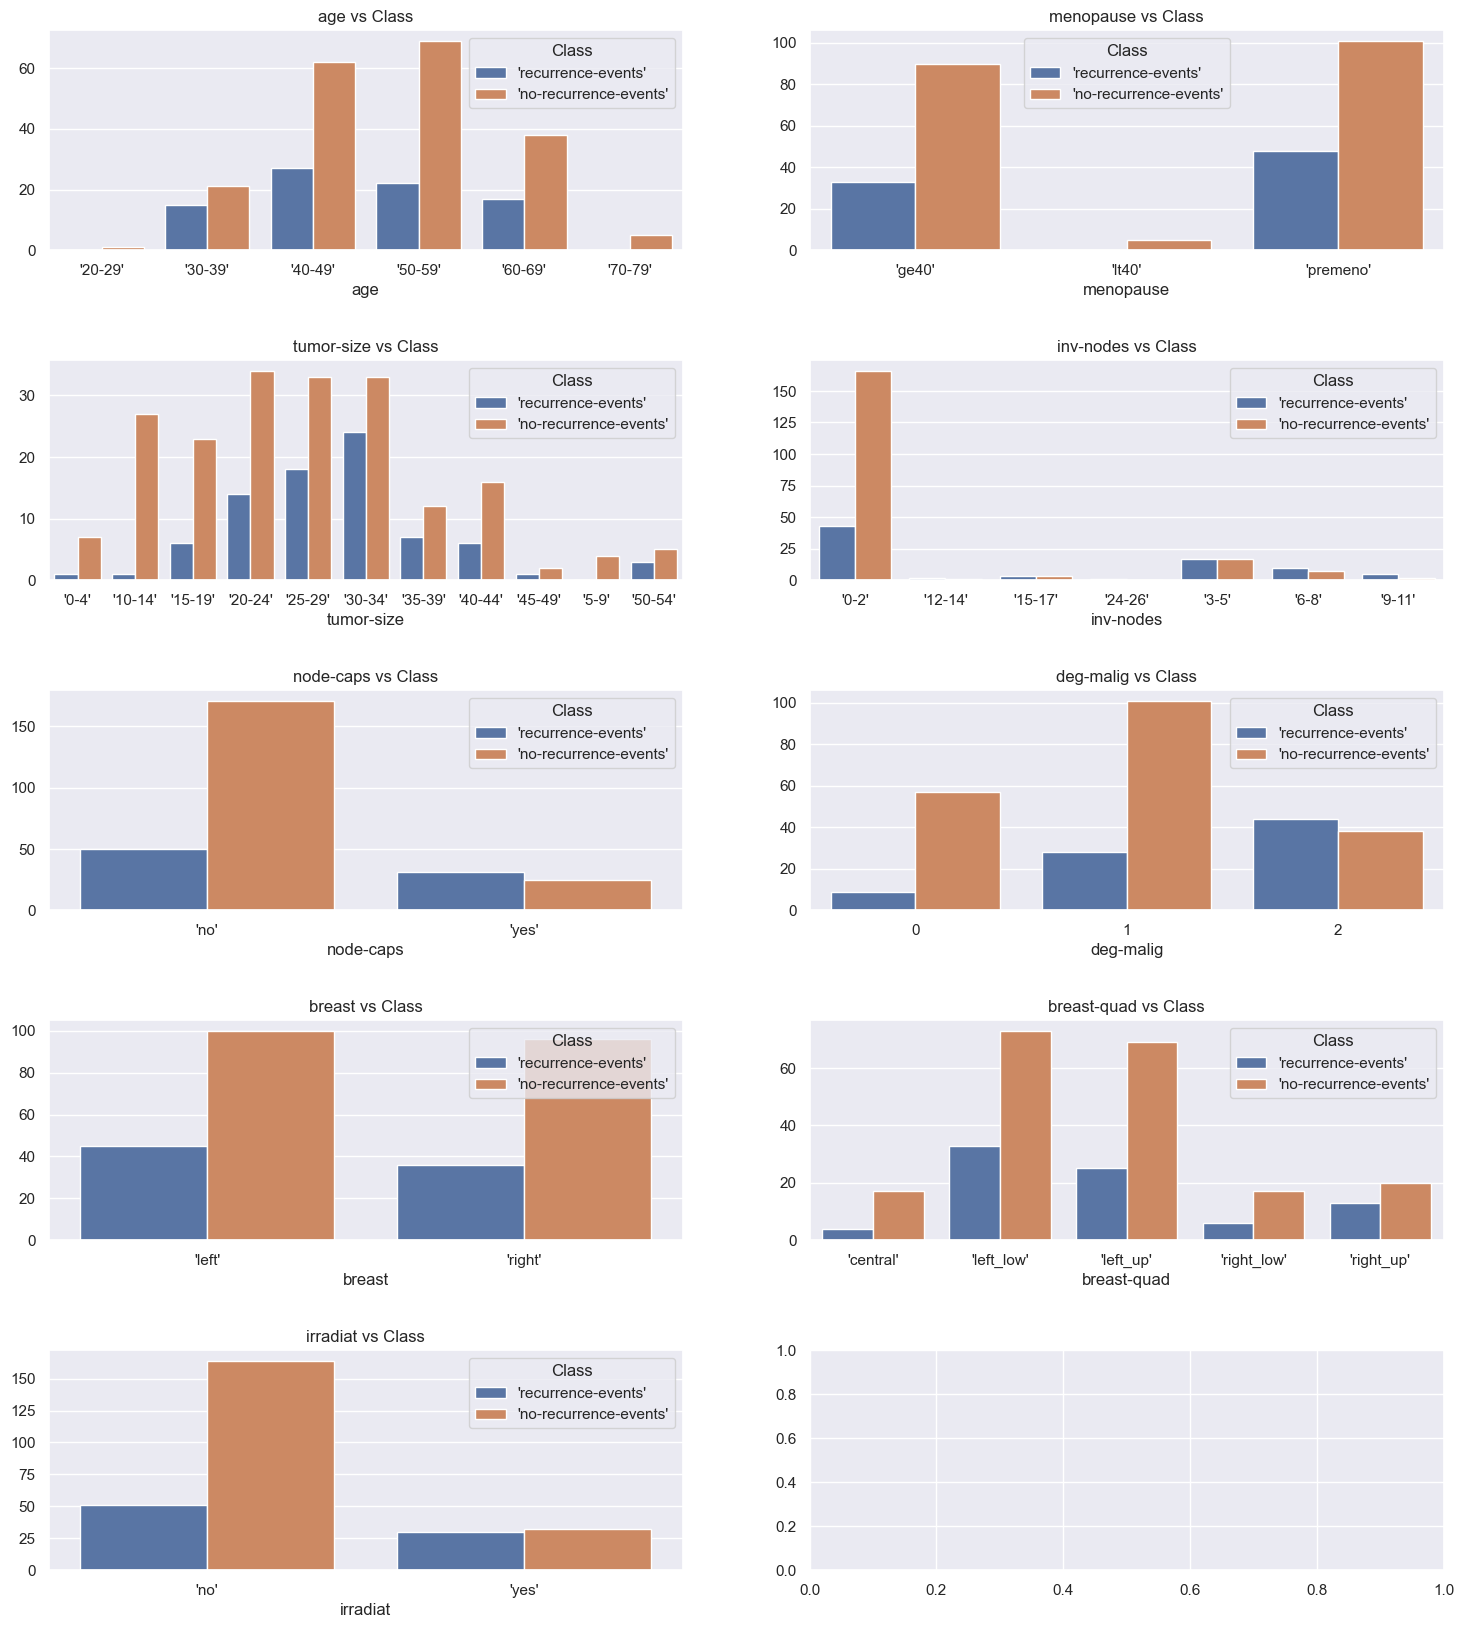

In [114]:
# Set the figure size and style
plt.figure(figsize=(18, 20))
sns.set_theme(style="darkgrid")

# Create subplots with a 5x2 grid
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    ax = axes[i]
    order = sorted(df[col].unique())  
    sns.countplot(data=df, x=col, hue='Class', ax=ax, order=order)  
    ax.set_title(f'{col} vs Class')
    ax.set_xlabel(col)
    ax.legend(title='Class')
    ax.set_ylabel('')  

if len(df.columns) < len(axes):
    for j in range(len(df.columns), len(axes)):
        fig.delaxes(axes[j])

plt.show()


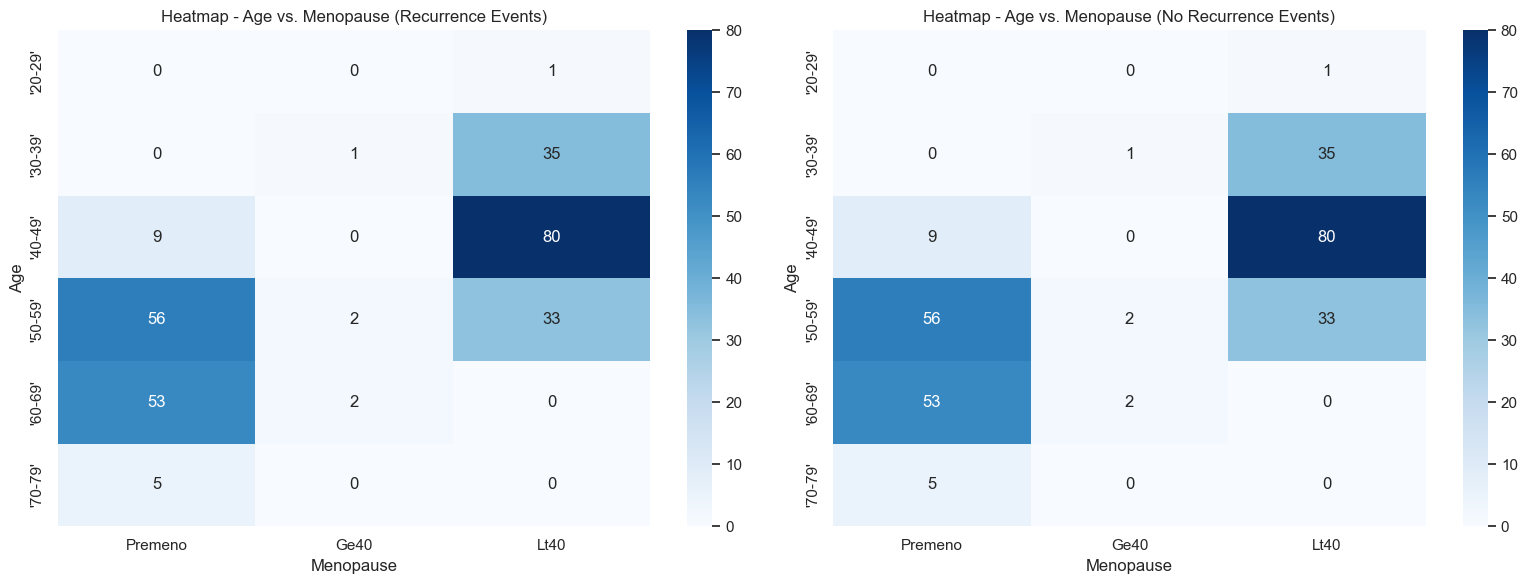

In [115]:
# Create a crosstab of age and menopause for 'recurrence-events'
recurrence_events_crosstab = pd.crosstab(df['age'], df['menopause'])

# Create a crosstab of age and menopause for 'no-recurrence-events'
no_recurrence_events_crosstab = pd.crosstab(df['age'], df['menopause'])

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot heatmap for 'recurrence-events'
sns.heatmap(recurrence_events_crosstab, cmap='Blues', annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Heatmap - Age vs. Menopause (Recurrence Events)')
axes[0].set_xlabel('Menopause')
axes[0].set_ylabel('Age')
axes[0].set_xticks([0.5, 1.5, 2.5])
axes[0].set_xticklabels(['Premeno', 'Ge40', 'Lt40'])

# Plot heatmap for 'no-recurrence-events'
sns.heatmap(no_recurrence_events_crosstab, cmap='Blues', annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Heatmap - Age vs. Menopause (No Recurrence Events)')
axes[1].set_xlabel('Menopause')
axes[1].set_ylabel('Age')
axes[1].set_xticks([0.5, 1.5, 2.5])
axes[1].set_xticklabels(['Premeno', 'Ge40', 'Lt40'])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\Rohan Perera\AppData\Local\Temp\ipykernel_9544\809530413.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(sorted(df['age'].unique()))
C:\Users\Rohan Perera\AppData\Local\Temp\ipykernel_9544\809530413.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(sorted(df['tumor-size'].unique()))
C:\Users\Rohan Perera\AppData\Local\Temp\ipykernel_9544\809530413.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(sorted(df['inv-nodes'].unique()))
C:\Users\Rohan Perera\AppData\Local\Temp\ipykernel_9544\809530413.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(sorted(df['deg-malig'].unique()))


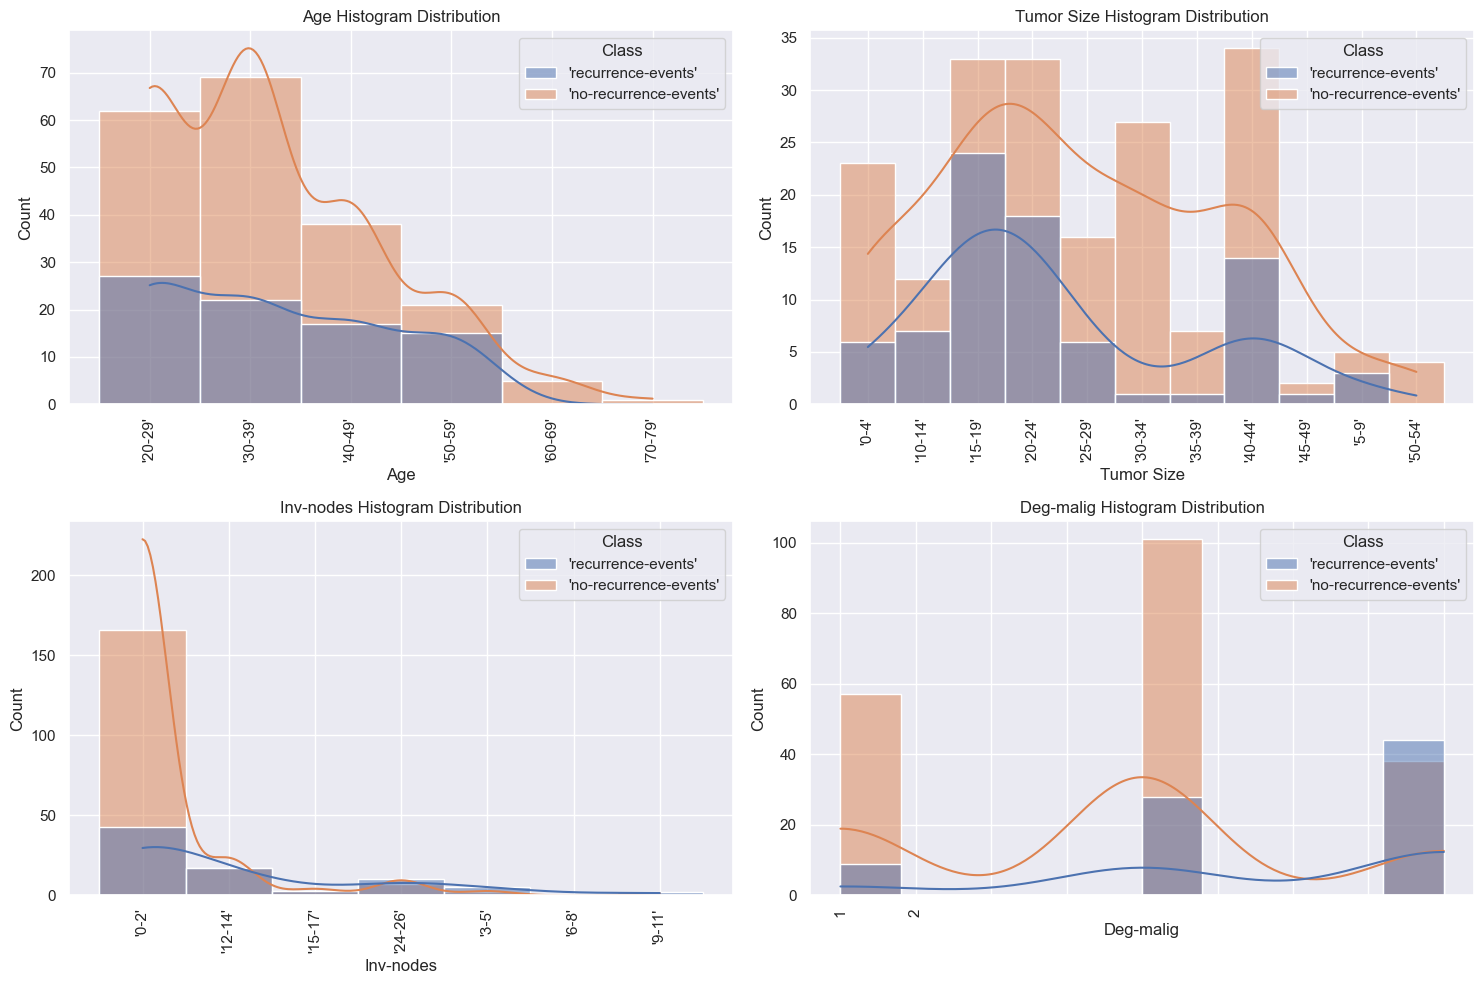

In [116]:
# Histograms for continuous variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='Class', kde=True)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(sorted(df['age'].unique()))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Histogram Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='tumor-size', hue='Class', kde=True)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(sorted(df['tumor-size'].unique()))
plt.xlabel('Tumor Size')
plt.ylabel('Count')
plt.title('Tumor Size Histogram Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='inv-nodes', hue='Class', kde=True)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(sorted(df['inv-nodes'].unique()))
plt.xlabel('Inv-nodes')
plt.ylabel('Count')
plt.title('Inv-nodes Histogram Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='deg-malig', hue='Class', kde=True)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(sorted(df['deg-malig'].unique()))
plt.xlabel('Deg-malig')
plt.ylabel('Count')
plt.title('Deg-malig Histogram Distribution')

plt.tight_layout()
plt.show()


In [117]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

Apply suitable method on the categorical data in the given dataset.

In [118]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes',2,'right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no',0,'right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no',1,'left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes',2,'right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes',1,'left','right_up','no','recurrence-events'


Age

In [119]:
df = pd.get_dummies(df, columns=['age'], prefix='age')
df.head()

,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79'
0,'premeno','15-19','0-2','yes',2,'right','left_up','no','recurrence-events',0,0,1,0,0,0
1,'ge40','15-19','0-2','no',0,'right','central','no','no-recurrence-events',0,0,0,1,0,0
2,'ge40','35-39','0-2','no',1,'left','left_low','no','recurrence-events',0,0,0,1,0,0
3,'premeno','35-39','0-2','yes',2,'right','left_low','yes','no-recurrence-events',0,0,1,0,0,0
4,'premeno','30-34','3-5','yes',1,'left','right_up','no','recurrence-events',0,0,1,0,0,0


Menopause

In [120]:
df = pd.get_dummies(df, columns=['menopause'], prefix='menopause')
df.head()

,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'ge40',menopause_'lt40',menopause_'premeno'
0,'15-19','0-2','yes',2,'right','left_up','no','recurrence-events',0,0,1,0,0,0,0,0,1
1,'15-19','0-2','no',0,'right','central','no','no-recurrence-events',0,0,0,1,0,0,1,0,0
2,'35-39','0-2','no',1,'left','left_low','no','recurrence-events',0,0,0,1,0,0,1,0,0
3,'35-39','0-2','yes',2,'right','left_low','yes','no-recurrence-events',0,0,1,0,0,0,0,0,1
4,'30-34','3-5','yes',1,'left','right_up','no','recurrence-events',0,0,1,0,0,0,0,0,1


Tumor-size

In [121]:
tumor_size_mapping = {
    "'0-4'": 0,
    "'5-9'": 1,
    "'10-14'": 2,
    "'15-19'": 3,
    "'20-24'": 4,
    "'25-29'": 5,
    "'30-34'": 6,
    "'35-39'": 7,
    "'40-44'": 8,
    "'45-49'": 9,
    "'50-54'": 10
}

df['tumor-size_encoded'] = df['tumor-size'].map(tumor_size_mapping)
df = df.drop('tumor-size', axis=1)  # Drop the 'tumor-size' column
df.head()


,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'ge40',menopause_'lt40',menopause_'premeno',tumor-size_encoded
0,'0-2','yes',2,'right','left_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,3
1,'0-2','no',0,'right','central','no','no-recurrence-events',0,0,0,1,0,0,1,0,0,3
2,'0-2','no',1,'left','left_low','no','recurrence-events',0,0,0,1,0,0,1,0,0,7
3,'0-2','yes',2,'right','left_low','yes','no-recurrence-events',0,0,1,0,0,0,0,0,1,7
4,'3-5','yes',1,'left','right_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,6


inv-nodes

In [122]:
inv_nodes_mapping = {
    "'0-2'": 0,
    "'3-5'": 1,
    "'6-8'": 2,
    "'9-11'": 3,
    "'12-14'": 4,
    "'15-17'": 5,
    "'24-26'": 6
}

df['inv-nodes_encoded'] = df['inv-nodes'].map(inv_nodes_mapping)
df = df.drop('inv-nodes', axis=1)  # Drop the 'inv-nodes' column
df.head()

,node-caps,deg-malig,breast,breast-quad,irradiat,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'ge40',menopause_'lt40',menopause_'premeno',tumor-size_encoded,inv-nodes_encoded
0,'yes',2,'right','left_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,3,0
1,'no',0,'right','central','no','no-recurrence-events',0,0,0,1,0,0,1,0,0,3,0
2,'no',1,'left','left_low','no','recurrence-events',0,0,0,1,0,0,1,0,0,7,0
3,'yes',2,'right','left_low','yes','no-recurrence-events',0,0,1,0,0,0,0,0,1,7,0
4,'yes',1,'left','right_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,6,1


node-caps

In [123]:
df['node-caps_encoded'] = df['node-caps'].map({'\'yes\'': 1, '\'no\'': 0})
df = df.drop('node-caps', axis=1)  # Drop the 'node-caps' column
df.head()


,deg-malig,breast,breast-quad,irradiat,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'ge40',menopause_'lt40',menopause_'premeno',tumor-size_encoded,inv-nodes_encoded,node-caps_encoded
0,2,'right','left_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,3,0,1
1,0,'right','central','no','no-recurrence-events',0,0,0,1,0,0,1,0,0,3,0,0
2,1,'left','left_low','no','recurrence-events',0,0,0,1,0,0,1,0,0,7,0,0
3,2,'right','left_low','yes','no-recurrence-events',0,0,1,0,0,0,0,0,1,7,0,1
4,1,'left','right_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,6,1,1


Breast

In [124]:
df['breast_encoded'] = df['breast'].map({'\'right\'': 1, '\'left\'': 0})
df = df.drop('breast', axis=1)  # Drop the 'breast' column
df.head()


,deg-malig,breast-quad,irradiat,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'ge40',menopause_'lt40',menopause_'premeno',tumor-size_encoded,inv-nodes_encoded,node-caps_encoded,breast_encoded
0,2,'left_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,3,0,1,1
1,0,'central','no','no-recurrence-events',0,0,0,1,0,0,1,0,0,3,0,0,1
2,1,'left_low','no','recurrence-events',0,0,0,1,0,0,1,0,0,7,0,0,0
3,2,'left_low','yes','no-recurrence-events',0,0,1,0,0,0,0,0,1,7,0,1,1
4,1,'right_up','no','recurrence-events',0,0,1,0,0,0,0,0,1,6,1,1,0


Breast quad

In [125]:
df = pd.get_dummies(df, columns=['breast-quad'], prefix='breast-quad')
df.head()


,deg-malig,irradiat,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'ge40',...,menopause_'premeno',tumor-size_encoded,inv-nodes_encoded,node-caps_encoded,breast_encoded,breast-quad_'central',breast-quad_'left_low',breast-quad_'left_up',breast-quad_'right_low',breast-quad_'right_up'
0,2,'no','recurrence-events',0,0,1,0,0,0,0,...,1,3,0,1,1,0,0,1,0,0
1,0,'no','no-recurrence-events',0,0,0,1,0,0,1,...,0,3,0,0,1,1,0,0,0,0
2,1,'no','recurrence-events',0,0,0,1,0,0,1,...,0,7,0,0,0,0,1,0,0,0
3,2,'yes','no-recurrence-events',0,0,1,0,0,0,0,...,1,7,0,1,1,0,1,0,0,0
4,1,'no','recurrence-events',0,0,1,0,0,0,0,...,1,6,1,1,0,0,0,0,0,1


irradiat

In [126]:
df['irradiat_encoded'] = df['irradiat'].map({'\'yes\'': 1, '\'no\'': 0})
df = df.drop('irradiat', axis=1)
df.head()

,deg-malig,Class,age_'20-29',age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'ge40',menopause_'lt40',...,tumor-size_encoded,inv-nodes_encoded,node-caps_encoded,breast_encoded,breast-quad_'central',breast-quad_'left_low',breast-quad_'left_up',breast-quad_'right_low',breast-quad_'right_up',irradiat_encoded
0,2,'recurrence-events',0,0,1,0,0,0,0,0,...,3,0,1,1,0,0,1,0,0,0
1,0,'no-recurrence-events',0,0,0,1,0,0,1,0,...,3,0,0,1,1,0,0,0,0,0
2,1,'recurrence-events',0,0,0,1,0,0,1,0,...,7,0,0,0,0,1,0,0,0,0
3,2,'no-recurrence-events',0,0,1,0,0,0,0,0,...,7,0,1,1,0,1,0,0,0,1
4,1,'recurrence-events',0,0,1,0,0,0,0,0,...,6,1,1,0,0,0,0,0,1,0


Selecting Random Forest Classifier 

In [127]:
classifier = RandomForestClassifier()

Define the parameter grid

In [128]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

Split the data

In [129]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Create Grid Search OBject

In [131]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy')

Performing Grid Search

In [132]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Parameters and score

In [145]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 300}
Best Score: 0.7375757575757576


In [134]:

y_pred = grid_search.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


                        precision    recall  f1-score   support

'no-recurrence-events'       0.80      0.95      0.87        42
   'recurrence-events'       0.67      0.29      0.40        14

              accuracy                           0.79        56
             macro avg       0.73      0.62      0.63        56
          weighted avg       0.77      0.79      0.75        56



Auto ML 

In [176]:
from tpot import TPOTClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


# Create and fit TPOT classifier
tpot = TPOTClassifier(generations=10, population_size=50, random_state=42)
tpot.fit(X_train, y_train)

# Get the best pipeline from TPOT
best_pipeline = tpot.fitted_pipeline_

# Calculate accuracy
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# Make predictions
predictions = best_pipeline.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, predictions, pos_label="'recurrence-events'")
recall = recall_score(y_test, predictions, pos_label="'recurrence-events'")
f1 = f1_score(y_test, predictions, pos_label="'recurrence-events'")

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.75
Precision: 0.5
Recall: 0.2857142857142857
F1 Score: 0.36363636363636365
